### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [8]:
loanData = pd.read_csv("loan.csv")

#### Verify the data has been read correctly

In [9]:
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Checking shape of the data read

In [10]:
loanData.shape

(39717, 111)

#### Verify empty values

In [11]:
loanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [12]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning

   #### Remove empty columns

In [13]:
loanData.dropna(axis = 1, how = 'all', inplace = True)

In [14]:
# Verifying the empty columns has been removed from the data set

loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


   ### Observation: 
   ##### We could see above that the data set has lesser number of columns. 
   ##### We could also see that some of the columns have the same value which might not be very useful for the analysis

In [15]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Removing columns which have same values for all entries as they dont contribute to the analysis

In [16]:
column_unique = loanData.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [17]:
# Removing columns having single values that dont contribute to the analysis
loanData.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths' ,'delinq_amnt',  'tax_liens','pub_rec_bankruptcies'], axis = 1, inplace = True)

In [18]:
# Verify the columns has been removed from the data set
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


### Observations:
##### We see from the above results that the columsn have been removed from the data set

In [19]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### Cleaning up additional columns that are not required for the analysis 
##### - values that are unique per record 
#####  -values that are created post loan is approved

In [20]:
loanData.drop(['id','member_id','url','zip_code','out_prncp','out_prncp_inv','title','emp_title','funded_amnt','delinq_2yrs','total_rec_int','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis = 1, inplace = True)
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,next_pymnt_d
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,NaN,NaN,3,0,13648,83.70%,9,5863.155187,5833.84,NaN
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,NaN,NaN,3,0,1687,9.40%,4,1008.710000,1008.71,NaN
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,NaN,NaN,2,0,2956,98.50%,10,3005.666844,3005.67,NaN
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,35.0,NaN,10,0,5598,21%,37,12231.890000,12231.89,NaN
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,38.0,NaN,15,0,27783,53.90%,38,3513.330000,3513.33,Jun-16


In [21]:
# verify final data set
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  desc                    26777 non-null  object 
 14  purpose                 39717 non-null

#### Understand the data

In [22]:
loanData.describe()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv
count,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,12153.596544,11567.149118
std,7456.670694,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,9042.040766,8942.672613
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,5576.930000,5112.310000
50%,10000.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,9899.640319,9287.150000
75%,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,16534.433040,15798.810000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000


In [23]:
loanData['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

##### Removing the current loan records as we cannot identify defaulters from it

In [24]:
loanData = loanData[loanData.loan_status != "Current"]
loanData

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,next_pymnt_d
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,NaN,NaN,3,0,13648,83.70%,9,5863.155187,5833.84,NaN
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,NaN,NaN,3,0,1687,9.40%,4,1008.710000,1008.71,NaN
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,NaN,NaN,2,0,2956,98.50%,10,3005.666844,3005.67,NaN
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,35.0,NaN,10,0,5598,21%,37,12231.890000,12231.89,NaN
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,NaN,NaN,9,0,7963,28.30%,12,5632.210000,5632.21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,...,0.0,0.0,13,0,7274,13.10%,40,2822.969293,1213.88,NaN
39713,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,...,5.0,0.0,6,0,8847,26.90%,9,9913.491822,1020.51,NaN
39714,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,...,0.0,0.0,11,0,9698,19.40%,20,5272.161128,1397.12,NaN
39715,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,...,0.0,0.0,17,0,85607,0.70%,26,5174.198551,672.66,NaN


##### Check for missing values

In [25]:
loanData.isna().sum()

loan_amnt                     0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
desc                      12527
purpose                       0
addr_state                    0
dti                           0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    24905
mths_since_last_record    35837
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
next_pymnt_d              38577
dtype: int64

In [26]:
loanData.drop(["next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record", "desc"], axis = 1, inplace = True)

In [27]:
loanData

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,27.65,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,1.00,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,8.72,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,20.00,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,11.20,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,...,11.33,Nov-90,0,13,0,7274,13.10%,40,2822.969293,1213.88
39713,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,...,6.40,Dec-86,1,6,0,8847,26.90%,9,9913.491822,1020.51
39714,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,...,2.30,Oct-98,0,11,0,9698,19.40%,20,5272.161128,1397.12
39715,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,...,3.72,Nov-88,0,17,0,85607,0.70%,26,5174.198551,672.66


In [28]:
loanData.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
dtype: int64

#### Handle missing values

In [29]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

In [30]:
emp_length_mode = loanData.emp_length.mode()
emp_length_mode

0    10+ years
Name: emp_length, dtype: object

In [31]:
loanData.emp_length.fillna(loanData.emp_length.mode()[0], inplace = True)
loanData.emp_length.isna().sum()

0

In [32]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

###### Checking the relevant columns individually

In [33]:
loanData['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [34]:
loanData['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [35]:
# Removing the '%' symbol from data set
loanData['int_rate'] = loanData['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [36]:
loanData['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [37]:
loanData['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [38]:
loanData['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [39]:
loanData['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [40]:
loanData['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [41]:
loanData['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [42]:
loanData['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [43]:
m, y = loanData['issue_d'].str.split('-').str

In [44]:
y.value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

In [45]:
m.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_d, dtype: int64

In [46]:
# Create derived columns and drop the issue date column
loanData['issue_y'] = pd.to_numeric(y)
loanData['issue_m'] = m
loanData.drop(columns=['issue_d'], inplace=True)

In [47]:
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,issue_y,issue_m
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,1,3,0,13648,83.70%,9,5863.155187,5833.84,11,Dec
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,5,3,0,1687,9.40%,4,1008.710000,1008.71,11,Dec
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2,2,0,2956,98.50%,10,3005.666844,3005.67,11,Dec
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,1,10,0,5598,21%,37,12231.890000,12231.89,11,Dec
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,3,9,0,7963,28.30%,12,5632.210000,5632.21,11,Dec


In [48]:
loanData['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [49]:
loanData['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [50]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  float64
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  addr_state           38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [51]:
# Convert the loan status to numeric values for easy analysis
loanData['loan_status_num'] = loanData['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [52]:
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,issue_y,issue_m,loan_status_num
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,13648,83.70%,9,5863.155187,5833.84,11,Dec,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,3,0,1687,9.40%,4,1008.710000,1008.71,11,Dec,1
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,2956,98.50%,10,3005.666844,3005.67,11,Dec,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,5598,21%,37,12231.890000,12231.89,11,Dec,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,9,0,7963,28.30%,12,5632.210000,5632.21,11,Dec,0


In [53]:
loanData.annual_inc

0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38577, dtype: float64

## We have now prepared our data to perform the EDA

##### Checking for outliers in relevant columns

<AxesSubplot:xlabel='annual_inc'>

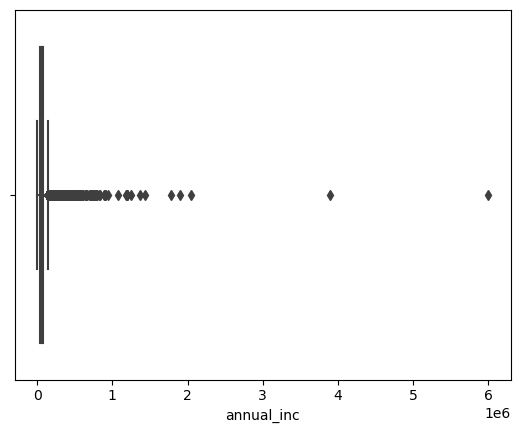

In [54]:
sns.boxplot(x=loanData['annual_inc'])

#### Obserbvation
##### Outliers are present in the data set and we need to remove them from the analysis. In order to do so, need to look at the quantiles data

In [55]:
quantile_data = loanData.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [56]:
loanData = loanData[loanData.annual_inc <= loanData['annual_inc'].quantile(0.95)]

<AxesSubplot:xlabel='annual_inc'>

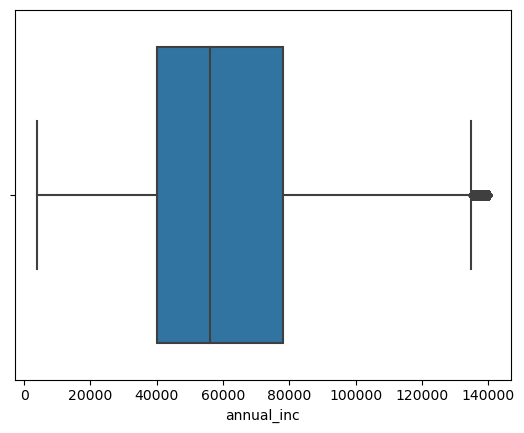

In [57]:
sns.boxplot(loanData.annual_inc)

<AxesSubplot:xlabel='loan_amnt'>

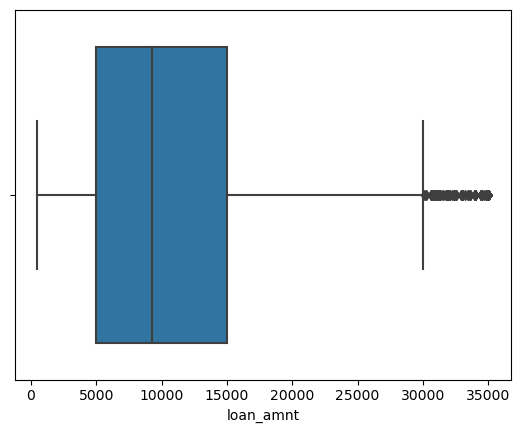

In [58]:
# Checking outliers in loan_amnt
sns.boxplot(loanData.loan_amnt)

##### There are very few outliers in the dataset, but we can ignore them as it is mostly continuous

<AxesSubplot:xlabel='funded_amnt_inv'>

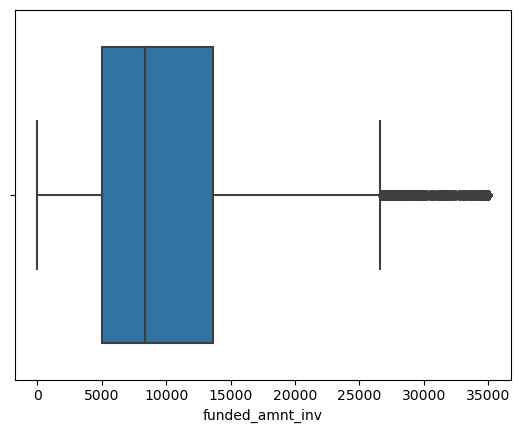

In [59]:
# Checking outliers in funded_amnt_inv
sns.boxplot(loanData.funded_amnt_inv)

<AxesSubplot:xlabel='total_pymnt'>

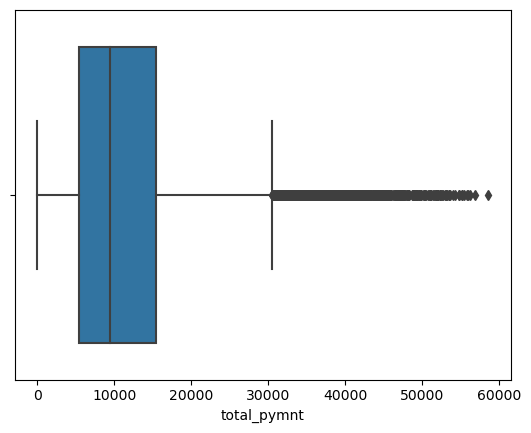

In [60]:
sns.boxplot(loanData.total_pymnt)

##### There are outliers but we can ignore them as it mostly continuous

### Univariate Analysis

In [61]:
# Checking quantitative fields
loanData['loan_amnt'].describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

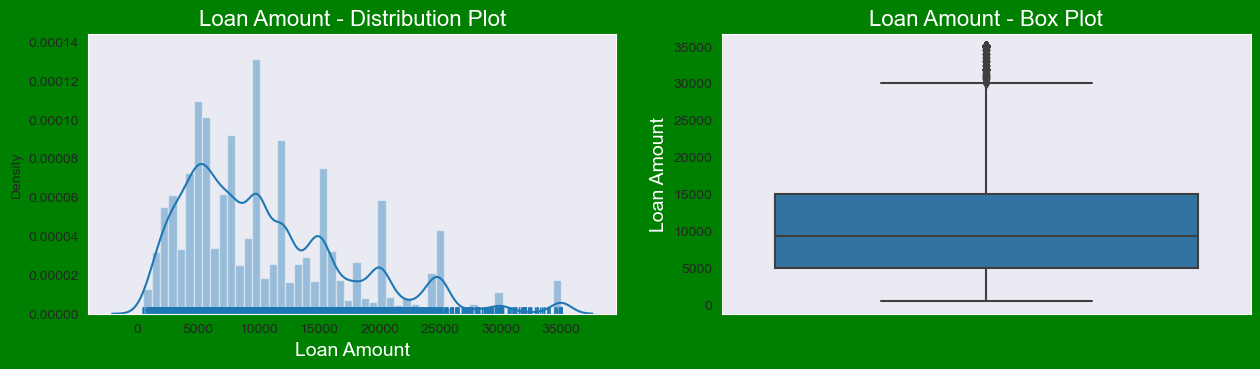

In [62]:
# loan amount
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

#### Observation:
##### Most loans are in the range of 5000 - 150000

In [63]:
loanData.total_pymnt.describe()

count    36654.000000
mean     11442.033637
std       8409.185261
min          0.000000
25%       5413.772960
50%       9370.821818
75%      15459.534622
max      58563.679930
Name: total_pymnt, dtype: float64

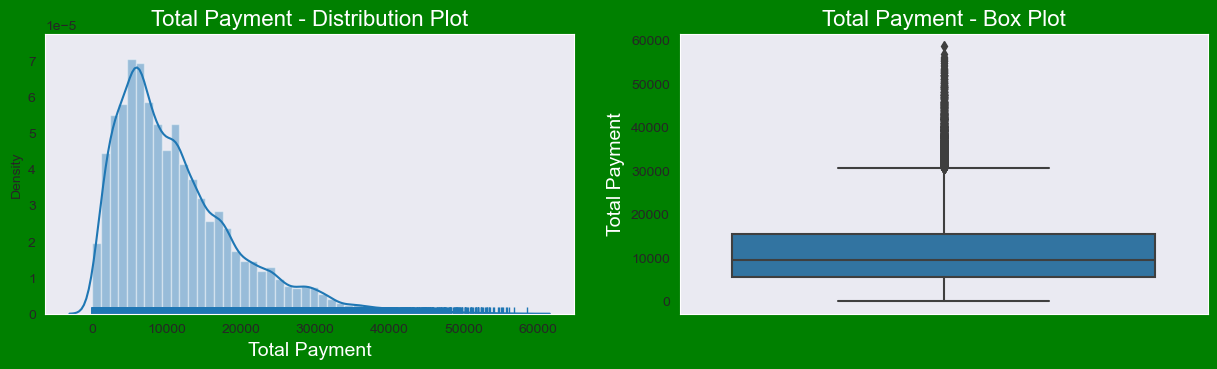

In [64]:
# total payment
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['total_pymnt'],rug = True)
ax.set_title('Total Payment - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Total Payment',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['total_pymnt'])
ax.set_title('Total Payment - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Total Payment',fontsize=14,color='w')
plt.show()

In [65]:
loanData['int_rate'].describe()

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

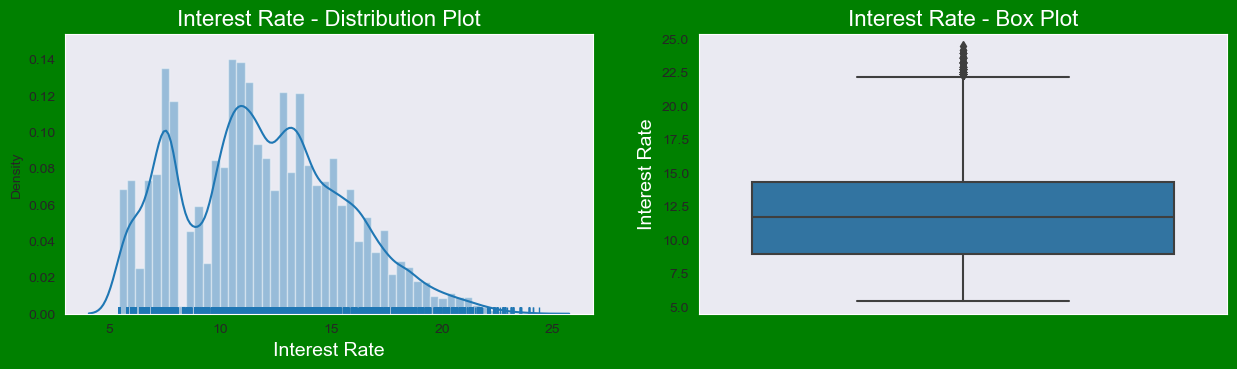

In [66]:
# int_rate
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

##### Observation: Interest rates lie in the range 9-15 %

In [67]:
loanData['annual_inc'].describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

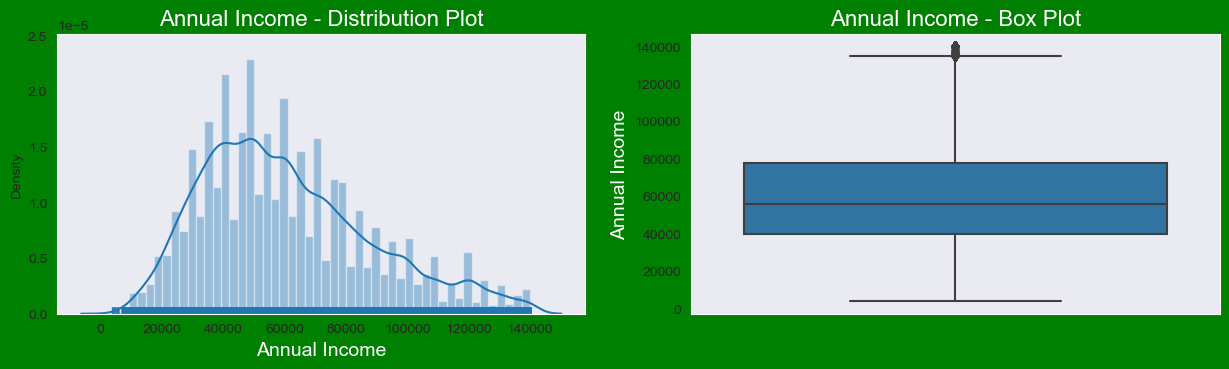

In [68]:
# annual_inc
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

#### Observation: Annual income lies in the range of 40000 - 80000

#### Visualizing non quanititative values

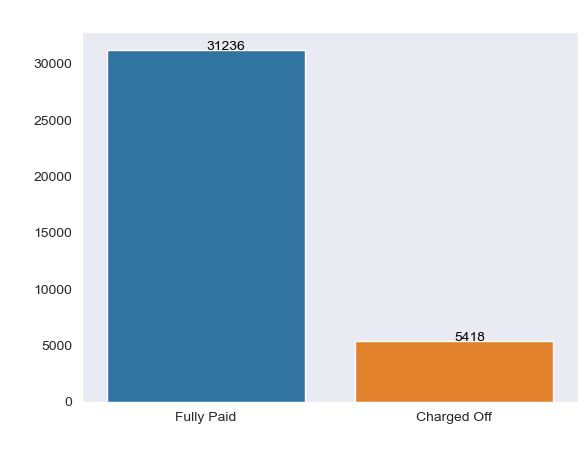

In [69]:
# Loan Status
ax = sns.countplot(x = 'loan_status', data = loanData)
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')
s=loanData['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

#### Obserbvation - almost 14% of the total loans were charged off

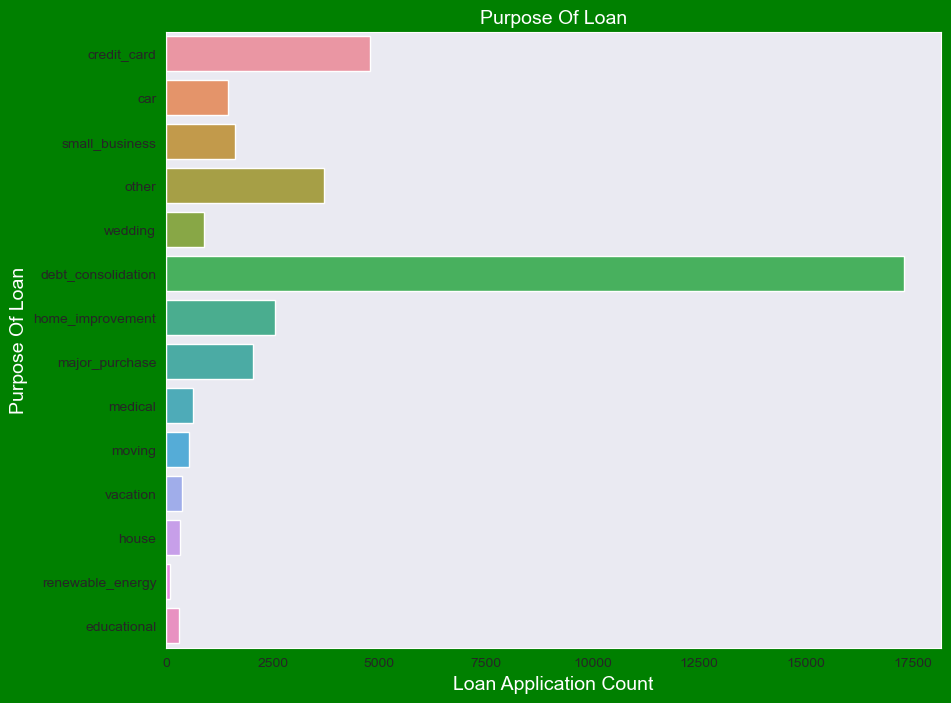

In [96]:
# Purpose
plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loanData)
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

##### Observation : Most loans were taken for debt_consolidation followed by credit_card

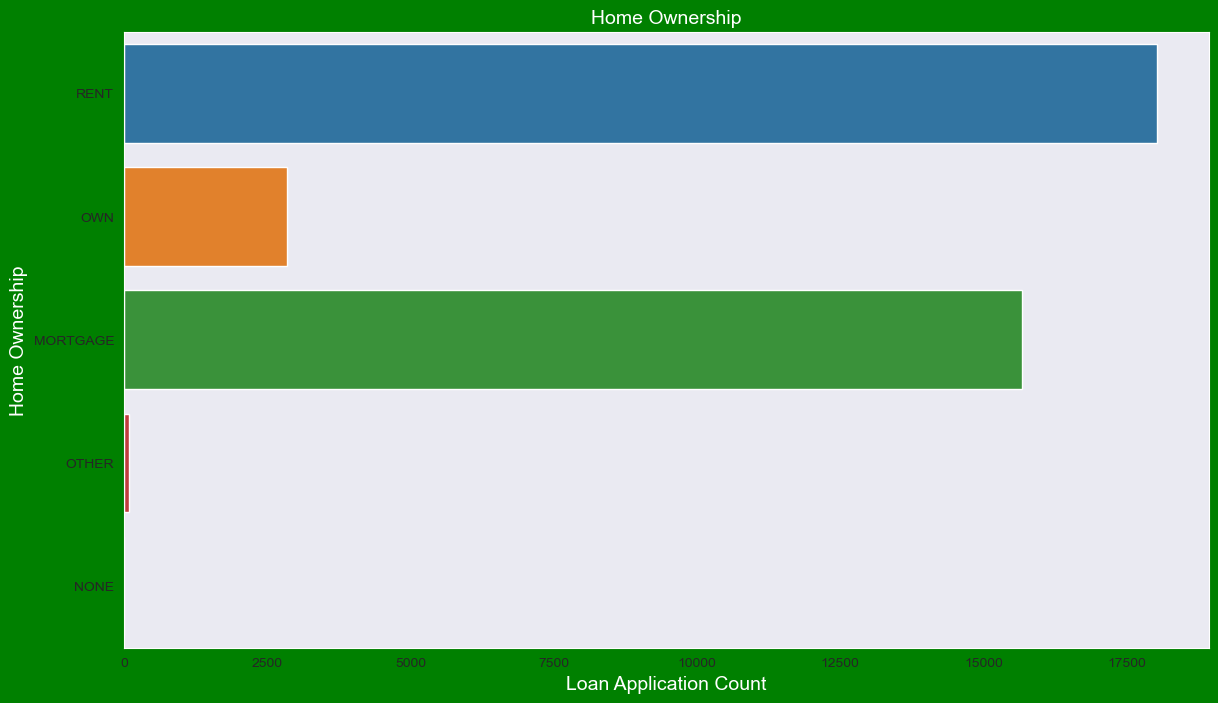

In [71]:
# home_ownership
plt.figure(figsize=(14,8),facecolor='g')
sns.set_style("dark")
ax = sns.countplot(y="home_ownership",data=loanData)
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Home Ownership',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

##### Observation : Most of the loan applicants live in rent or have mortaged their home

In [72]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36654 non-null  int64  
 1   funded_amnt_inv      36654 non-null  float64
 2   term                 36654 non-null  object 
 3   int_rate             36654 non-null  float64
 4   installment          36654 non-null  float64
 5   grade                36654 non-null  object 
 6   sub_grade            36654 non-null  object 
 7   emp_length           36654 non-null  object 
 8   home_ownership       36654 non-null  object 
 9   annual_inc           36654 non-null  float64
 10  verification_status  36654 non-null  object 
 11  loan_status          36654 non-null  object 
 12  purpose              36654 non-null  object 
 13  addr_state           36654 non-null  object 
 14  dti                  36654 non-null  float64
 15  earliest_cr_line     36654 non-null 

In [73]:
loanData.groupby(['issue_y', 'issue_m']).count()

loan_amnt  funded_amnt_inv  term  int_rate  installment  \
issue_y issue_m                                                            
7       Aug             28               28    28        28           28   
        Dec             82               82    82        82           82   
        Jul             24               24    24        24           24   
        Jun              1                1     1         1            1   
        Nov             34               34    34        34           34   
        Oct             46               46    46        46           46   
        Sep             15               15    15        15           15   
8       Apr            146              146   146       146          146   
        Aug             67               67    67        67           67   
        Dec            207              207   207       207          207   
        Feb            168              168   168       168          168   
        Jan            164              164   164       164          164   
        Jul             81               81    81        81           81   
        Jun             65               65    65        65           65   
        Mar            224              224   224       224          224   
        May             69               69    69        69           69   
        Nov            180              180   180       180          180   
        Oct             89               89    89        89           89   
        Sep             29               29    29        29           29   
9       Apr            280              280   280       280          280   
        Aug            391              391   391       391          391   
        Dec            553              553   553       553          553   
        Feb            250              250   250       250          250   
        Jan            229              229   229       229          229   
        Jul            355              355   355       355          355   
        Jun            338              338   338       338          338   
        Mar            267              267   267       267          267   
        May            305              305   305       305          305   
        Nov            569              569   569       569          569   
        Oct            513              513   513       513          513   
        Sep            426              426   426       426          426   
10      Apr            791              791   791       791          791   
        Aug           1029             1029  1029      1029         1029   
        Dec           1210             1210  1210      1210         1210   
        Feb            592              592   592       592          592   
        Jan            554              554   554       554          554   
        Jul           1084             1084  1084      1084         1084   
        Jun            987              987   987       987          987   
        Mar            698              698   698       698          698   
        May            886              886   886       886          886   
        Nov           1076             1076  1076      1076         1076   
        Oct           1075             1075  1075      1075         1075   
        Sep           1031             1031  1031      1031         1031   
11      Apr           1496             1496  1496      1496         1496   
        Aug           1700             1700  1700      1700         1700   
        Dec           1967             1967  1967      1967         1967   
        Feb           1241             1241  1241      1241         1241   
        Jan           1321             1321  1321      1321         1321   
        Jul           1652             1652  1652      1652         1652   
        Jun           1617             1617  1617      1617         1617   
        Mar           1363             1363  1363      1363      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


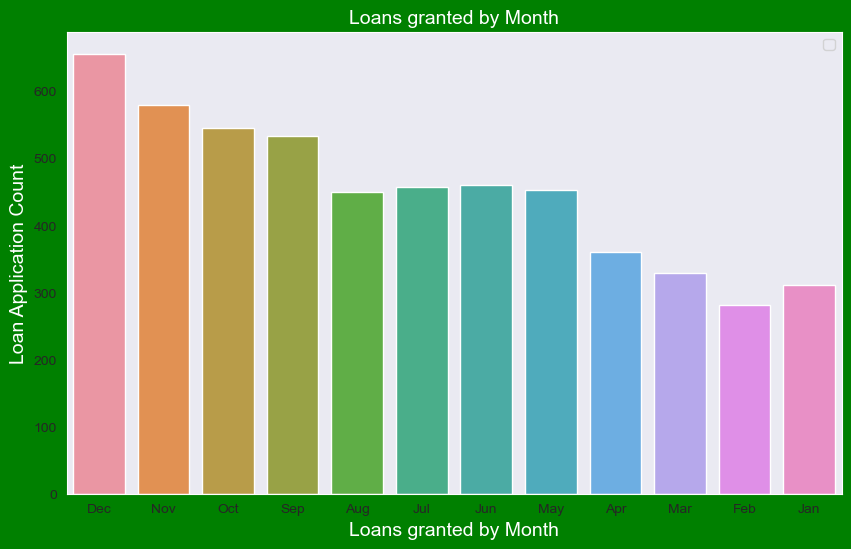

In [74]:
# Loans sanctions by months
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x='issue_m', data=loanData[loanData['loan_status']=='Charged Off'])
ax.set_title('Loans granted by Month',fontsize=14,color='w')
ax.set_xlabel('Loans granted by Month',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


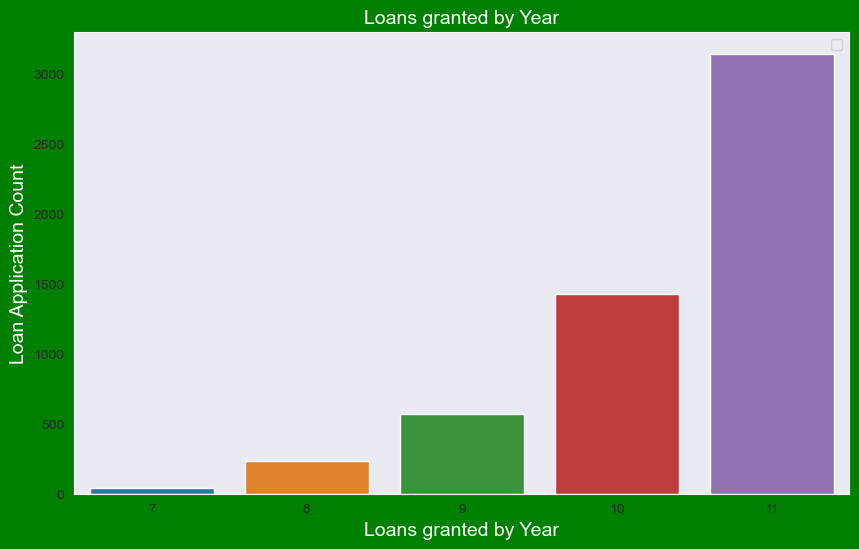

In [75]:
# Loans sanctions by months
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x='issue_y', data=loanData[loanData['loan_status']=='Charged Off'])
ax.set_title('Loans granted by Year',fontsize=14,color='w')
ax.set_xlabel('Loans granted by Year',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


#### Observation : Loans granted in the month of december and in the year 2011

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


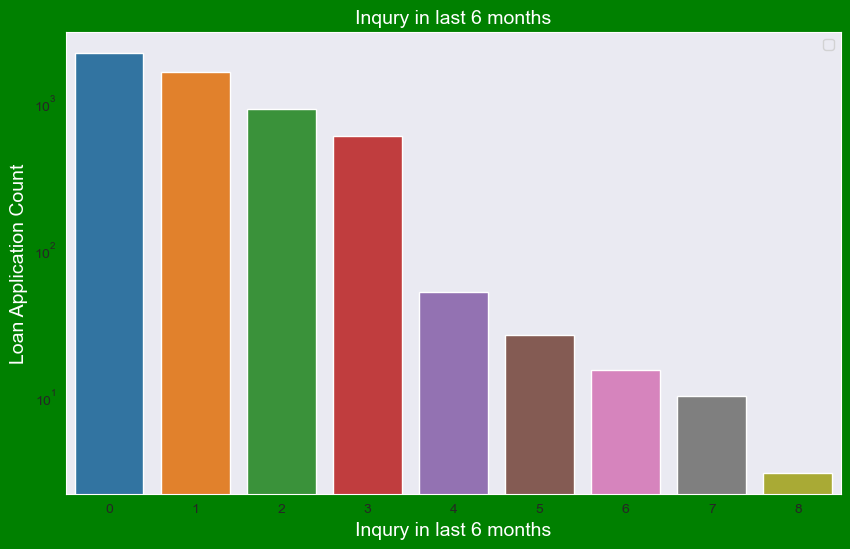

In [76]:
# Charged off loans by inquiry
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x='inq_last_6mths', data=loanData[loanData['loan_status']=='Charged Off'])
ax.set_yscale('log')
ax.set_title('Inqury in last 6 months',fontsize=14,color='w')
ax.set_xlabel('Inqury in last 6 months',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#####  Observation : For most of the loan applicants, inquiry was not done in the last 6 months

### Observation Summary - Univariate Analysis
##### Most loans are in the range of 5000 - 150000
##### Interest rates lie in the range 9-15 %
##### Annual income lies in the range of 40000 - 80000
##### Almost 14% of the total loans were charged off
##### Most loans were taken for debt_consolidation followed by credit_card
##### Most of the loan applicants live in rent or have mortaged their home 
##### For most of the loan applicants, inquiry was not done in the last 6 months
##### Loans granted in the month of december and in the year 2011
##### For most of the loan applicants, inquiry was not done in the last 6 months




### Bivariate Analysis

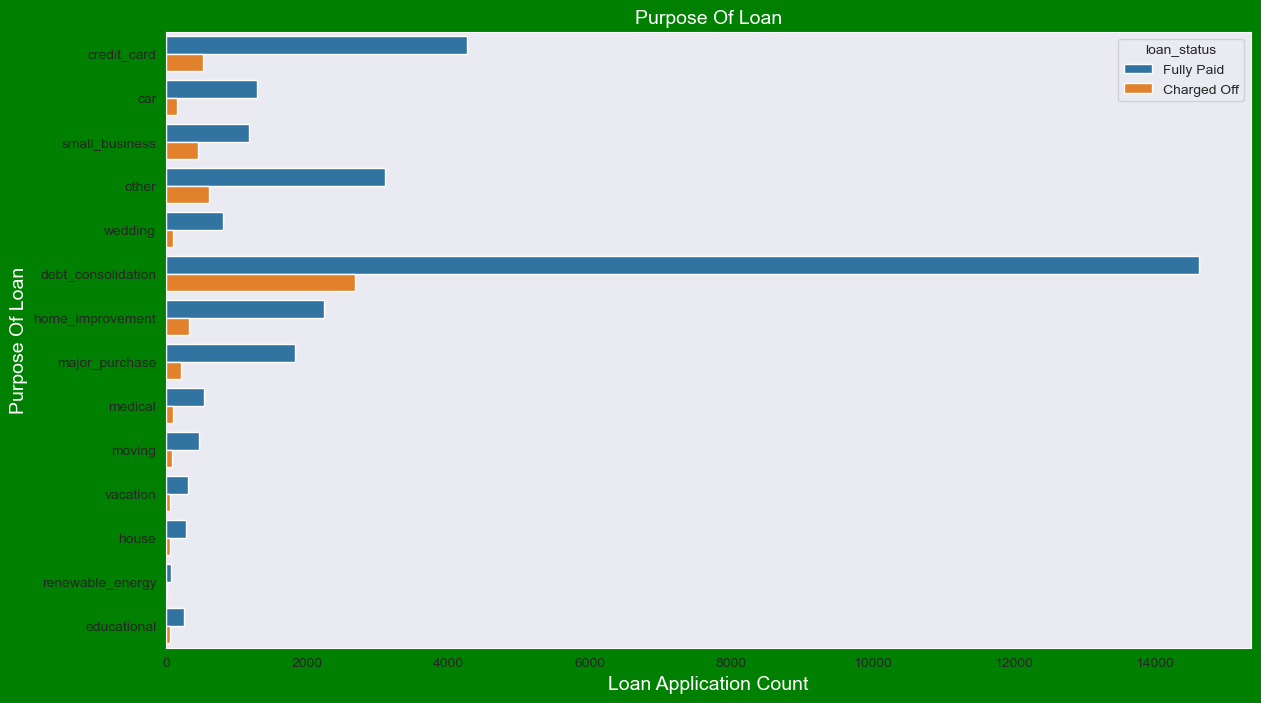

In [77]:
# Charged off loan by Purpuse of loan 
plt.figure(figsize=(14,8),facecolor='g')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loanData, hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

##### Charged off loans were highest for debt_consolidation

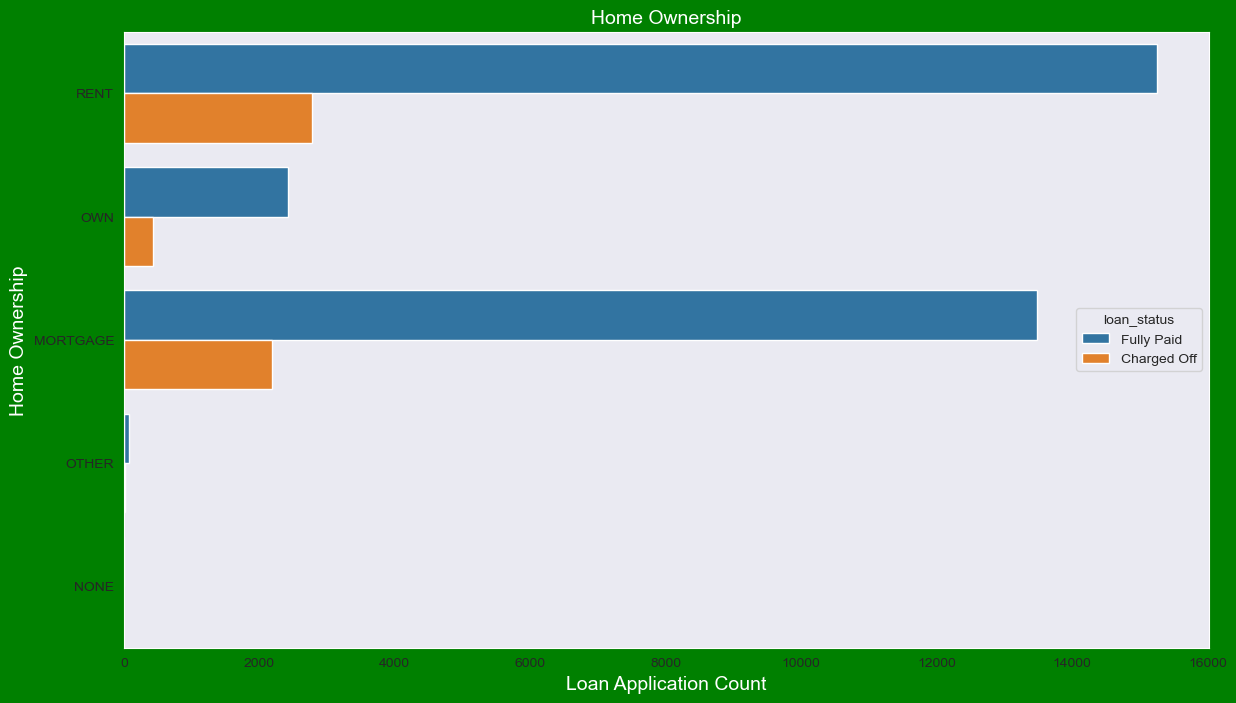

In [78]:
# Charged off loan by home_ownership
plt.figure(figsize=(14,8),facecolor='g')
sns.set_style("dark")
ax = sns.countplot(y="home_ownership",data=loanData, hue = 'loan_status')
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Home Ownership',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

##### Charged off loans were highest for people who have rented their homes followed by people who mortaged the home

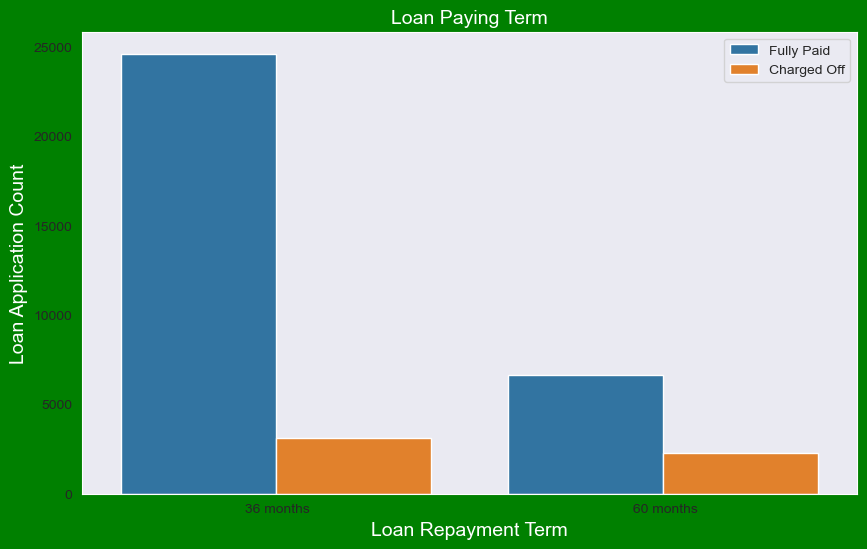

In [79]:
# Charged off loan by Loan pay term
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x="term",data=loanData,hue='loan_status')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


##### Observations : percentage of charged off loan were high when loan tenure was 60 months compared to loan tenure of 36 months

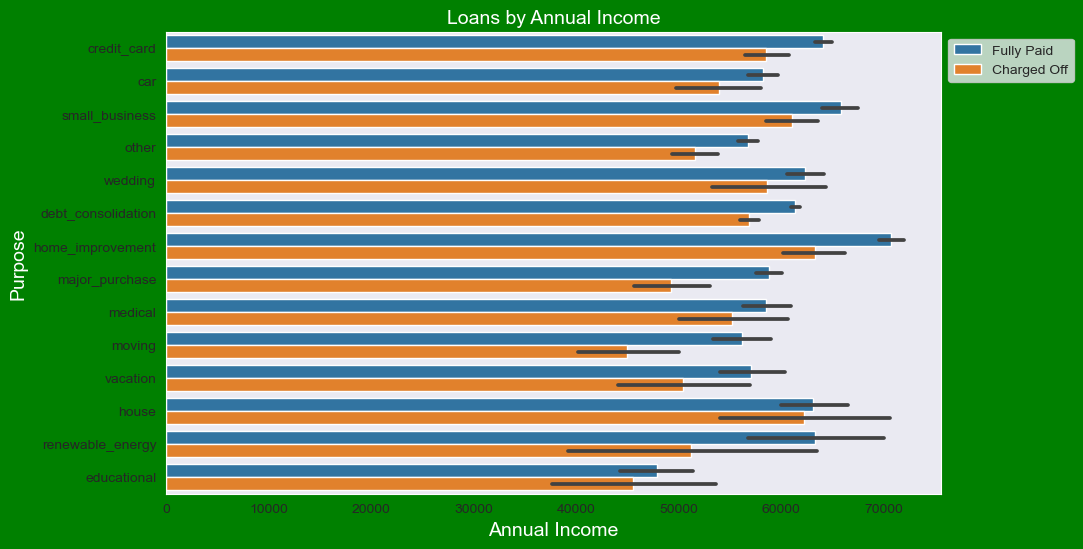

In [80]:
# Annual income vs purpose
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.barplot(data =loanData,x='annual_inc', y='purpose', hue ='loan_status')
ax.set_title('Loans by Annual Income',fontsize=14,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color = 'w')
ax.set_ylabel('Purpose',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()



##### Most applicants who applied loan for the purpose of home improvent were charged off
##### Loans applied for the purpose of moving or education were charged off the least

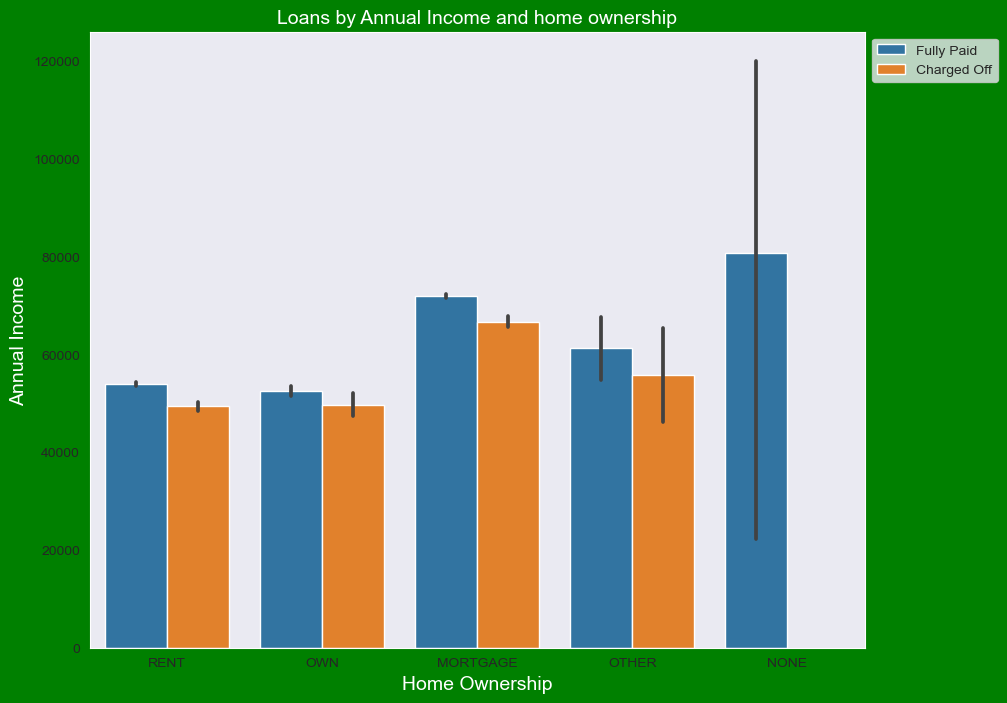

In [81]:
# Home ownerhsip by Annual Income
plt.figure(figsize=(10,8),facecolor='g')
ax = sns.barplot(data =loanData,x='home_ownership', y='annual_inc', hue ='loan_status')
ax.set_title('Loans by Annual Income and home ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Annual Income',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### Charged off loans were high when applicants had an annual income aout 80000 and had mortgaged thier homes 

In [82]:
loanData['annual_inc_grp'] = pd.cut(loanData['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [83]:
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,issue_y,issue_m,loan_status_num,annual_inc_grp
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,0,13648,83.70%,9,5863.155187,5833.84,11,Dec,0,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,0,1687,9.40%,4,1008.710000,1008.71,11,Dec,1,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,0,2956,98.50%,10,3005.666844,3005.67,11,Dec,0,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,0,5598,21%,37,12231.890000,12231.89,11,Dec,0,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,0,7963,28.30%,12,5632.210000,5632.21,11,Dec,0,31k-58k


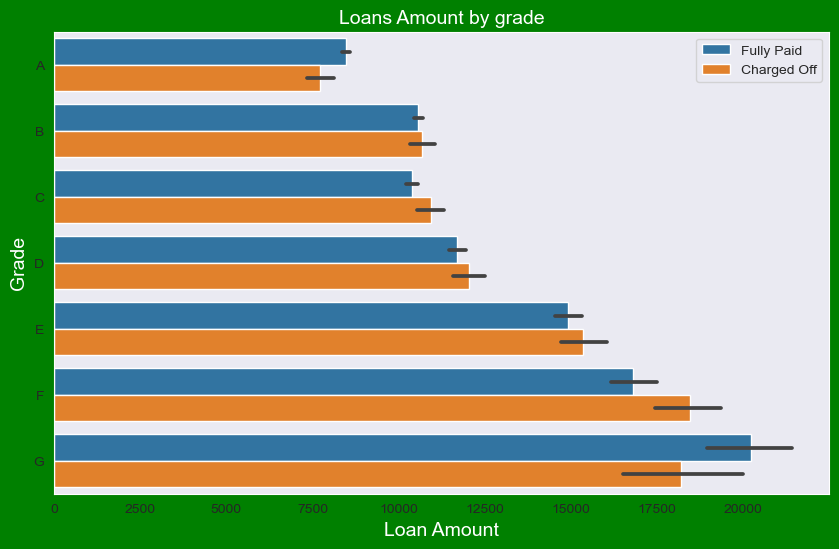

In [84]:
# Loan amount and grade

plt.figure(figsize=(10,6),facecolor='g')
ax = sns.barplot(data =loanData,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
ax.set_title('Loans Amount by grade',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
ax.set_ylabel('Grade',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### Maxium loans were charged off were grade is F followed by Grade G
##### Nearly 50% of the total loans granted to grade B were charged off

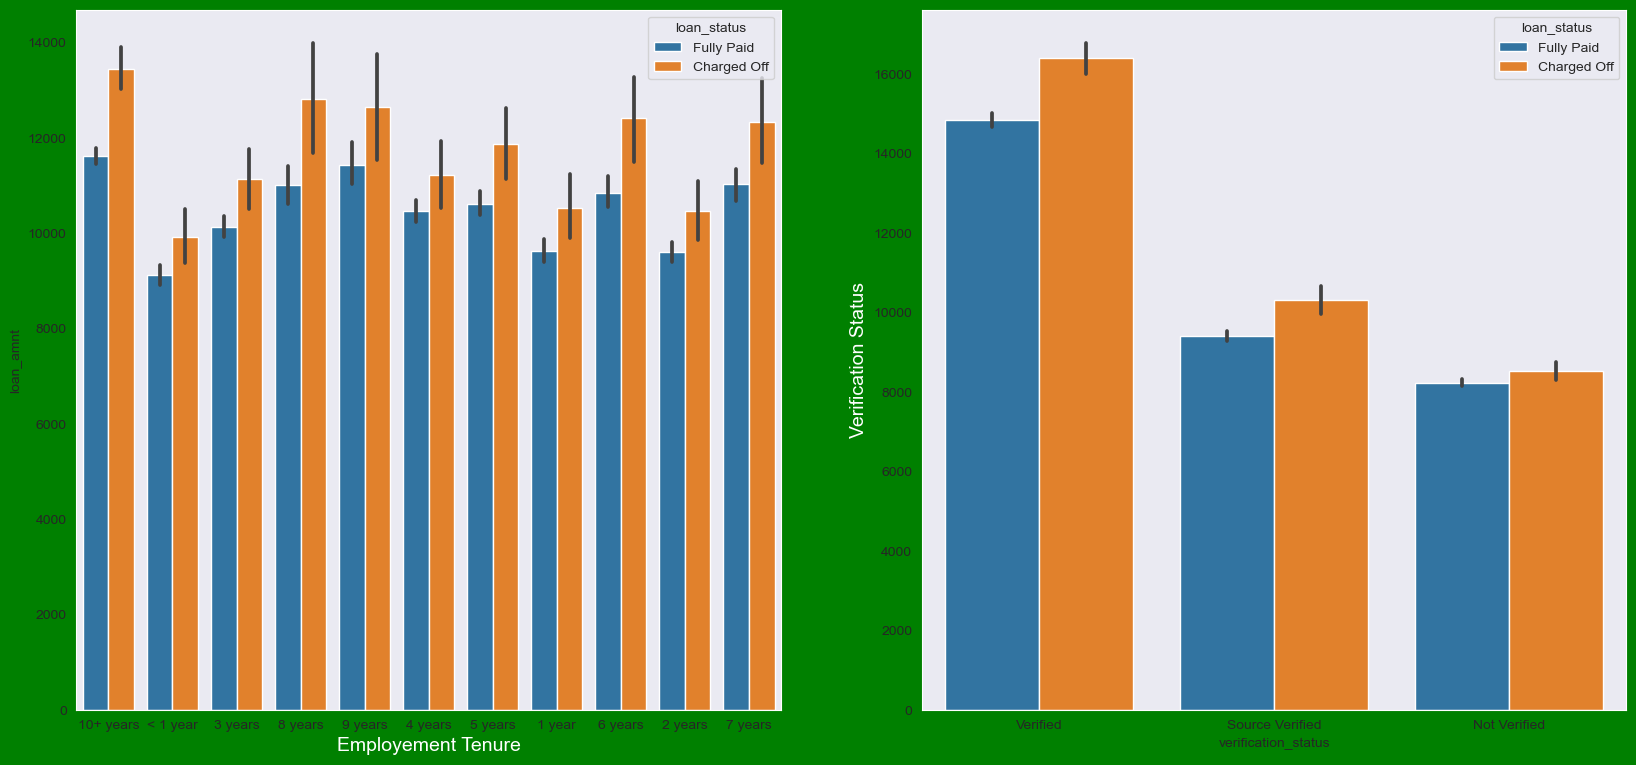

In [85]:
plt.figure(figsize=(20,20),facecolor='g')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.barplot(data =loanData,y='loan_amnt', x='emp_length', hue ='loan_status')
ax.set_xlabel('Employement Tenure',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.barplot(data =loanData,y='loan_amnt', x='verification_status', hue ='loan_status')
ax.set_ylabel('Verification Status',fontsize=14,color='w')
plt.show()

##### Employees with longer employment tend to get higher loan amount
##### The number of verification is higher when the loan amount is higher

In [86]:
loanData['annual_inc_cats'] = pd.cut(loanData['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [87]:
loanData.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,issue_y,issue_m,loan_status_num,annual_inc_grp,annual_inc_cats
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,13648,83.70%,9,5863.155187,5833.84,11,Dec,0,3k-31k,20000-40000
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,1687,9.40%,4,1008.710000,1008.71,11,Dec,1,3k-31k,20000-40000
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2956,98.50%,10,3005.666844,3005.67,11,Dec,0,3k-31k,0-20000
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,5598,21%,37,12231.890000,12231.89,11,Dec,0,31k-58k,40000-60000
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,7963,28.30%,12,5632.210000,5632.21,11,Dec,0,31k-58k,20000-40000


In [88]:
inc_range_vs_loan = loanData.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


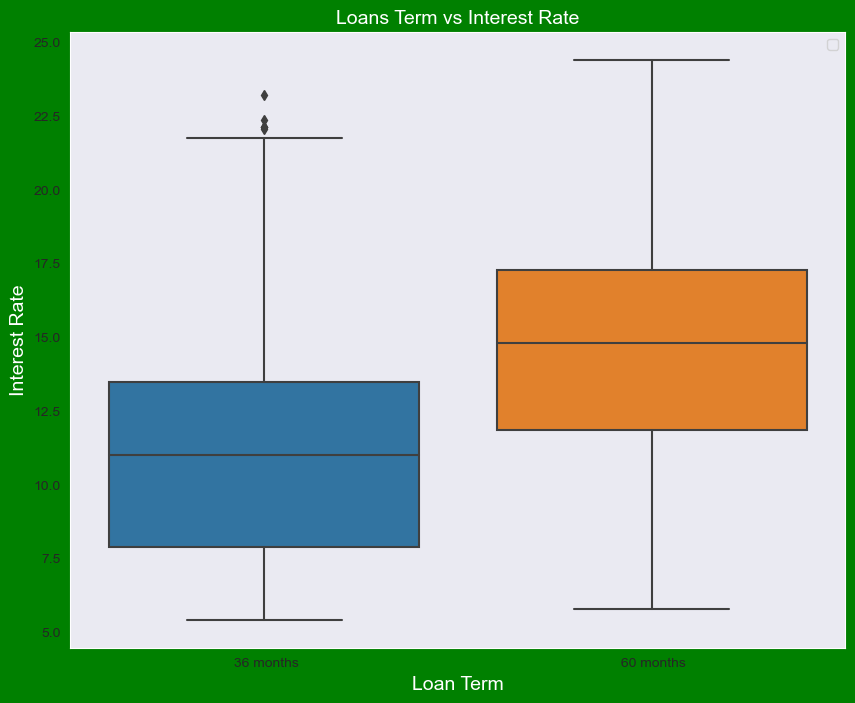

In [89]:
# Loan term vs Interest rate
plt.figure(figsize=(10,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='term', data =loanData)
ax.set_title('Loans Term vs Interest Rate',fontsize=14,color='w')
ax.set_xlabel('Loan Term',fontsize=14,color = 'w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### Interest rates are higher for tenure of 60 months

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


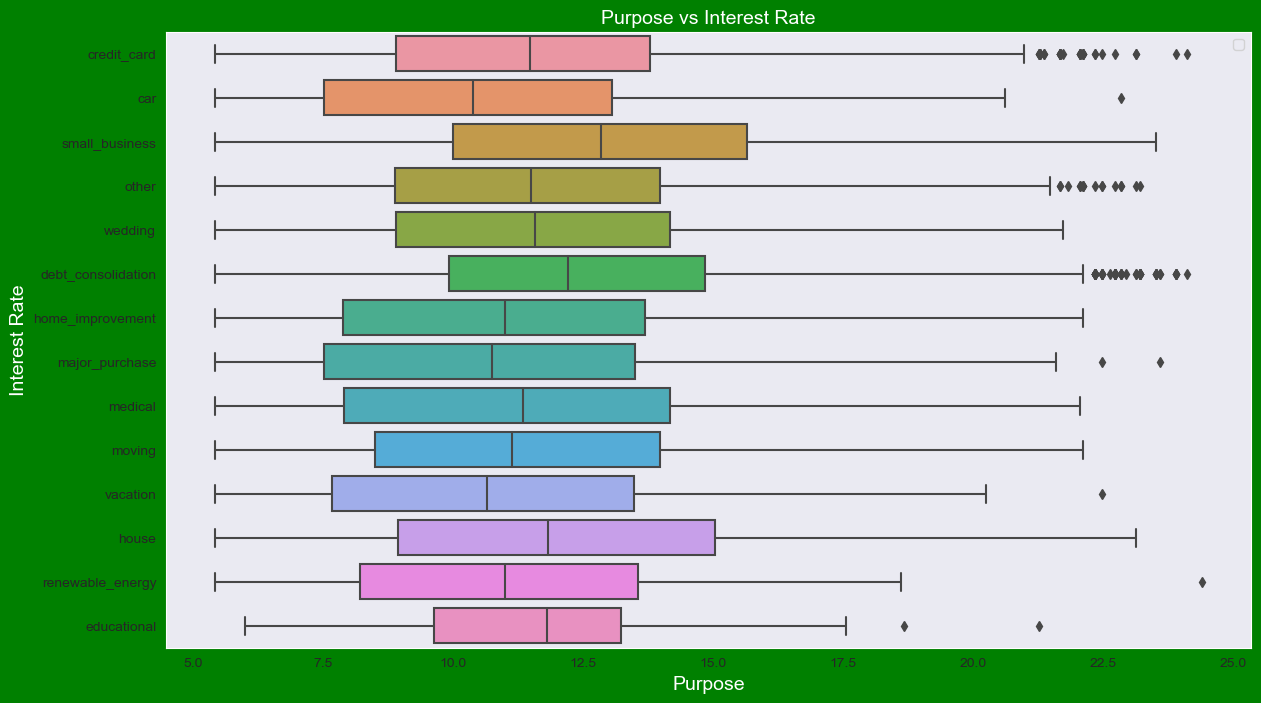

In [90]:
# Purpose vs Interest rate
plt.figure(figsize=(14,8),facecolor='g')
ax = sns.boxplot(x='int_rate', y='purpose', data =loanData)
ax.set_title('Purpose vs Interest Rate',fontsize=14,color='w')
ax.set_xlabel('Purpose',fontsize=14,color = 'w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### Average interst rates are higher for small business

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


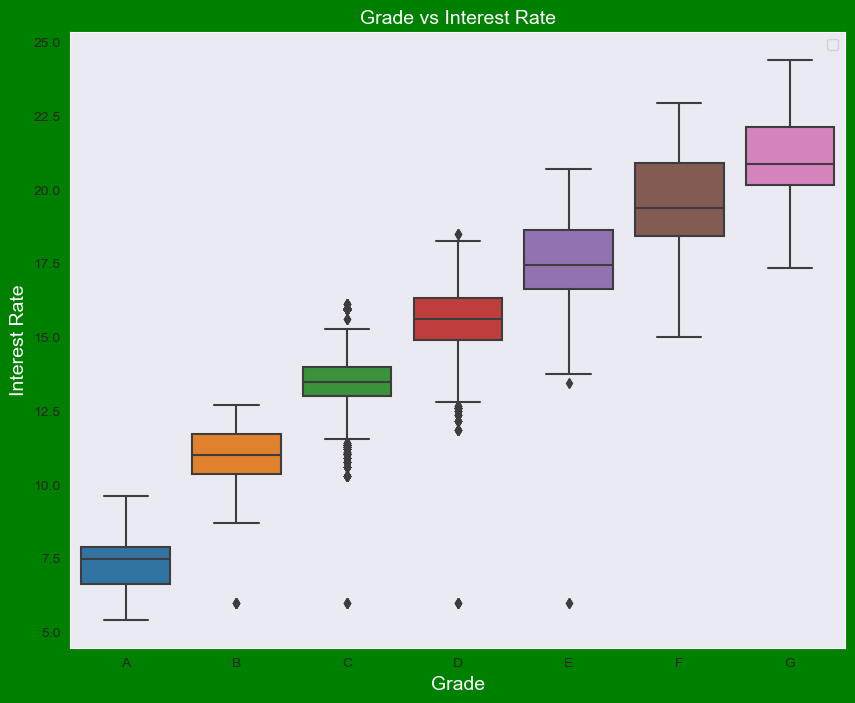

In [91]:
# Grades vs Interest
plt.figure(figsize=(10,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='grade', data =loanData,order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=14,color='w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### Interest rates increase with increase in grades
###### Higher credit grades attract low interest rates

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


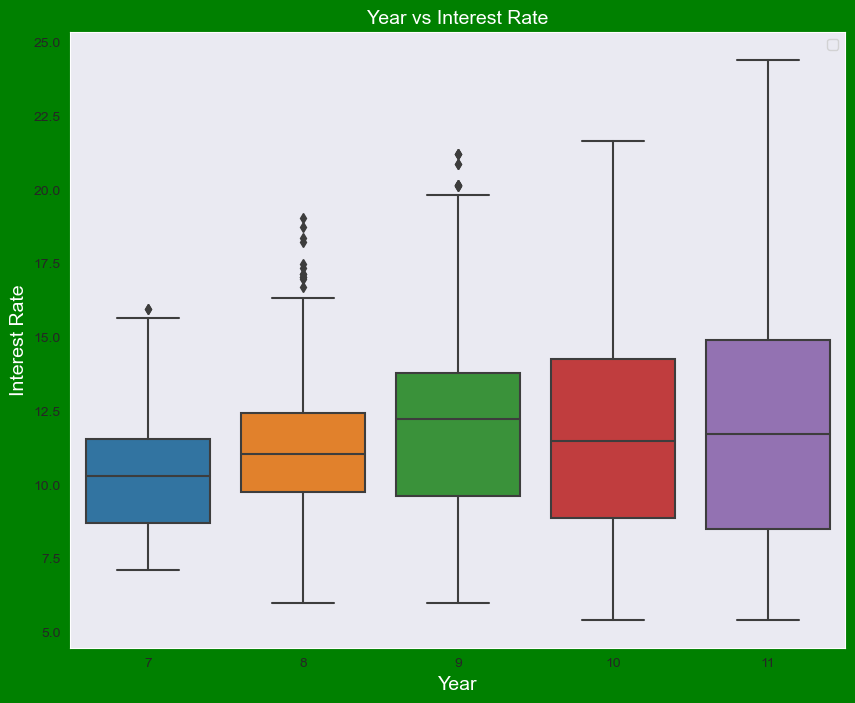

In [92]:
# Interest rate vs Year
plt.figure(figsize=(10,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='issue_y', data =loanData)
ax.set_title('Year vs Interest Rate',fontsize=14,color='w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### With every year passing by the interest reates have slowly increased

In [93]:
# Pair plot for multi variate analysis
loan_pair = loanData[['loan_amnt', 'annual_inc', 'issue_y','int_rate','loan_status']].copy()
loan_pair.head()


,loan_amnt,annual_inc,issue_y,int_rate,loan_status
0,5000,24000.0,11,10.65,Fully Paid
1,2500,30000.0,11,15.27,Charged Off
2,2400,12252.0,11,15.96,Fully Paid
3,10000,49200.0,11,13.49,Fully Paid
5,5000,36000.0,11,7.90,Fully Paid


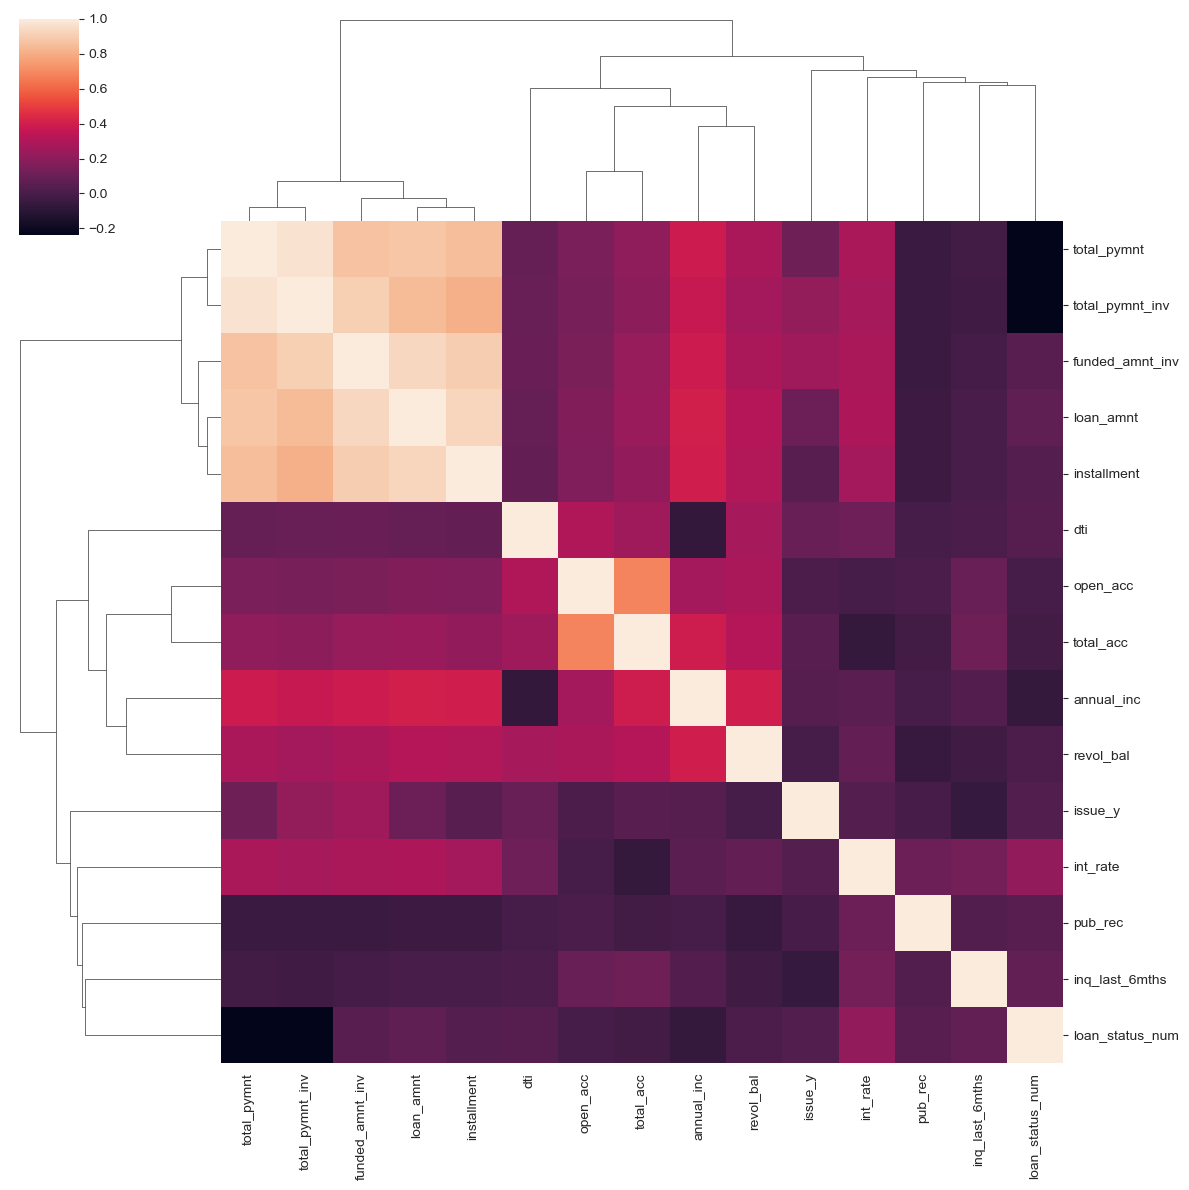

In [94]:
# Co-relations gris
sns.clustermap(data=loanData.corr(), figsize=(12,12))
plt.show()

### Observation Summary - Bivariate analysis

##### With every year passing by the interest reates have slowly increased
##### Average interst rates are higher for small business
##### Interest rates increase with increase in grades
###### Higher credit grades attract low interest rates
##### Interest rates are higher for tenure of 60 months
##### Employees with longer employment tend to get higher loan amount
##### The number of verification is higher when the loan amount is higher

##### Maximum loans were charged off were grade is F followed by Grade G
##### Nearly 50% of the total loans granted to grade B were charged off
##### Charged off loans were high when applicants had an annual income aout 80000 and had mortgaged thier homes 

##### Most applicants who applied loan for the purpose of home improvent were charged off
##### Loans applied for the purpose of moving or education were charged off the least
##### Number of charged off loans were highest for debt_consolidation
##### number of charged off loans were highest for people who have rented their homes followed by people who mortaged the home
##### Percentage of charged off loan were high when loan tenure was 60 months compared to loan tenure of 36 months


### Defaulting cases 

##### Applicants for 'home improvement' and income upto 60000 
##### Applicants who have their home 'mortgaged'
##### Applicants who received the loan with high interest rates
##### Applicants who received the loan in the month of december have a higher chance of defaulting
##### Applicants where grade is 'F' and loan amount ranges from 15000 - 20000
##### Applicants where grade is 'G' and interest is above 20%
##### Applicants with longer tenure of employment , 10 yrs and loan amount range is 10000-15000